In [1]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
import scipy
from exp.DFRdatasets.fig_utils import sum_all_container_by_filenames, plot_figs

smallest length of dictionary: 0 with length 5
smallest length of dictionary: 0 with length 5


/home/zzzace2000/anaconda2/envs/py36/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


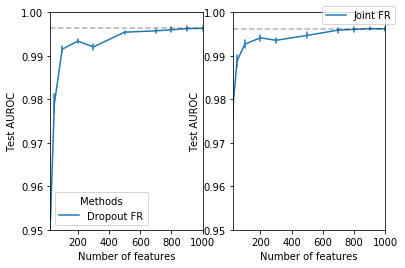

In [4]:
# the_container = sum_all_container_by_filenames([
#     "0408-nn_joint_rank:1e-2|0.1-svm_linear_test.pth",
#     "0408-nn_joint_rank:1e-2|0.5-svm_linear_test.pth",
#     "0408-nn_joint_rank:1e-2|0.9-svm_linear_test.pth",
# ], dataset='GISETTE')

container_arr = [sum_all_container_by_filenames([path], dataset='GISETTE') for path in [
    "0327-nn_rank:1e-2-svm_linear_test.pth",
    "0327-nn_joint_rank:1e-2-svm_linear_test.pth",
]]

fig, axes = plt.subplots(nrows=1, ncols=len(container_arr))
for i, the_container in enumerate(container_arr):
    the_container.set_names('Test AUROC', 'Number of features', 'Methods')
    plot_figs(the_container, 'svm_linear_test_auroc', ax=axes[i], fig=fig)
    
    axes[i].set_ylim(0.95, 1.)

# the_container.set_names('Test AUROC', 'Number of features', 'Methods')
# fig, ax = plt.subplots(figsize=(6, 4.5))
# fig, ax = plot_figs(the_container, 'svm_linear_test_auroc', ax=ax, fig=fig)
# ax.get_legend().set_visible(False)
# ax.set_xlim(0, 90)
# ax.set_xlabel('')
# ax.set_ylim(74, 130)
plt.legend(bbox_to_anchor=(1.1, 1.05))
# fig.savefig('YearMSD_zero.eps', format='eps', dpi=300, bbox_inches='tight')
# fig.savefig('legend.eps', format='eps', dpi=300, bbox_inches='tight')

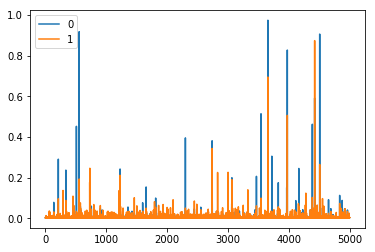

In [7]:
# for d_rate in np.arange(0.1, 1.0, 0.1):

result_dict = {}
for i, name in enumerate(["0327-nn_rank:1e-2-svm_linear_test.pth", "0327-nn_joint_rank:1e-2-svm_linear_test.pth"]):
    containers, dropout_rate_dict = torch.load(
        '../results/GISETTE/%s' % name)
    avg_dropout = np.mean([dropout_rate_dict[k] for k in dropout_rate_dict], axis=0)
    avg_dropout = (1. / (1 + np.exp(-avg_dropout)))
    
    result_dict[i] = avg_dropout
    plt.plot(avg_dropout, label=str(i))
    plt.legend()

## Calculate how they coherent to each other

In [8]:
print(scipy.stats.spearmanr(result_dict[0], result_dict[1]))

SpearmanrResult(correlation=0.68157616092990903, pvalue=0.0)


In [9]:
print(scipy.stats.pearsonr(result_dict[0], result_dict[1]))

(0.75581086, 0.0)
